In [29]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import confusion_matrix
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, \
    Dropout, Dense, Input, concatenate, ZeroPadding2D, \
    GlobalAveragePooling2D, AveragePooling2D, AvgPool2D, MaxPool2D, \
    Flatten, add, Activation
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall, FalseNegatives, FalsePositives,TrueNegatives,TruePositives, CategoricalCrossentropy
from tensorflow.keras.models import load_model
from keras.preprocessing import image

### tensorflow 2


In [2]:
DATASET_DIR = 'dataset'

In [3]:
os.listdir(DATASET_DIR)

['covid', 'normal']

In [4]:

import glob
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))
    
#fig = plt.figure()
#fig.suptitle('normal chest xray image')
#plt.imshow(normal_images[0], cmap='gray')



In [5]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))
#fig = plt.figure()
#fig.suptitle('covid chest xray image')
#plt.imshow(covid_images[0], cmap='gray')

In [6]:
print('number of covid images: {}, number of normal images: {}'.format(len(covid_images), len(normal_images)))

number of covid images: 201, number of normal images: 200


In [7]:
print(covid_images[0].shape)

(1482, 1989, 3)


In [8]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
CHANNELS = 3

INPUT_SHAPE = (IMG_WIDTH, IMG_HEIGHT, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6


In [9]:
# architecture
# 1 convo, 2 relu, 3 pooling, 4 fully

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(250, (3, 3)))
model.add(Activation('relu'))

In [13]:
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

In [14]:
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [15]:
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [16]:
# compile(lss, op, metr)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        1

## Generator

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)


In [18]:

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

Found 281 images belonging to 2 classes.


In [19]:
validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 120 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/48
46/46 [==============================] - 46s 998ms/step - loss: 0.7046 - accuracy: 0.4436 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/48
46/46 [==============================] - 23s 504ms/step - loss: 0.6904 - accuracy: 0.5797 - val_loss: 0.4963 - val_accuracy: 0.8000
Epoch 3/48
46/46 [==============================] - 18s 385ms/step - loss: 0.4138 - accuracy: 0.8436 - val_loss: 0.2347 - val_accuracy: 0.9083
Epoch 4/48
46/46 [==============================] - 18s 389ms/step - loss: 0.3955 - accuracy: 0.8509 - val_loss: 0.2050 - val_accuracy: 0.9500
Epoch 5/48
46/46 [==============================] - 17s 376ms/step - loss: 0.2950 - accuracy: 0.8982 - val_loss: 0.1503 - val_accuracy: 0.9583
Epoch 6/48
46/46 [==============================] - 17s 376ms/step - loss: 0.2684 - accuracy: 0.9200 - val_loss: 0.1757 - val_accuracy: 0.9500
Epoch 7/48
46/46 [==============================] - 17s 380ms/step

In [21]:
model.save('vgg16_covid.h5')

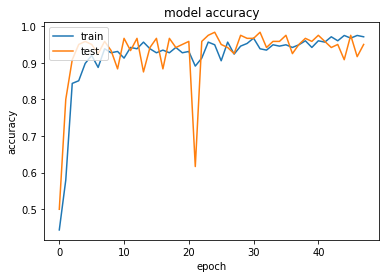

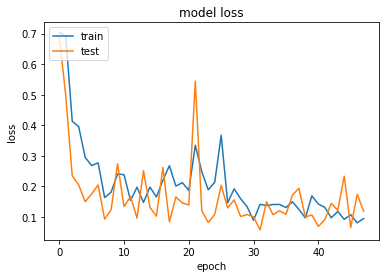

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
print("training_accuracy", history.history['accuracy'][-1]) # the last epoch (47)
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9709091186523438
validation_accuracy 0.949999988079071


In [50]:
label = validation_generator.classes

In [56]:
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
